In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('titanic_train.csv')
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
ds['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [5]:
ds['Parch'].value_counts()    #signifies the no.of parents/children accompanied

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [6]:
ds['SibSp'].value_counts()    #signifies the no.of siblings/spouses accompanied 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
ds.info()        #here we have got missing values for age,cabin and embarked columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handling missing datas

In [8]:
ds['Age'].isnull().sum()

177

In [9]:
ds['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
#from the above we had made an inference that 177 rows of age columns are having missing values so we can fill them with median value of ages

ds['Age'].fillna(ds['Age'].median(),inplace=True)


In [11]:
ds['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
ds['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
C111           1
D30            1
B38            1
C87            1
C104           1
Name: Cabin, Length: 147, dtype: int64

In [13]:
ds['Cabin'].isnull().sum()    #here we can't fill the missing values with mean,median or mode.let's leave it as of now and see what we can do later

687

In [14]:
ds['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
ds['Embarked'].isnull().sum()

2

In [16]:
ds['Embarked'].fillna(ds['Embarked'].mode(),inplace=True)    #here we have filled the missing datas with most frequently occured 'S' .

In [17]:
 ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


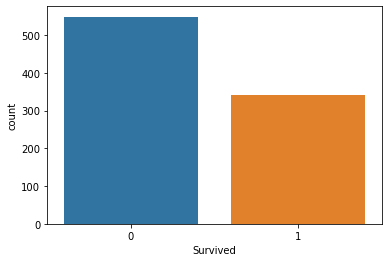

In [18]:
sns.countplot(ds['Survived'])

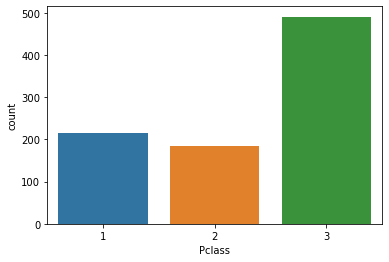

In [19]:
sns.countplot(ds['Pclass'])

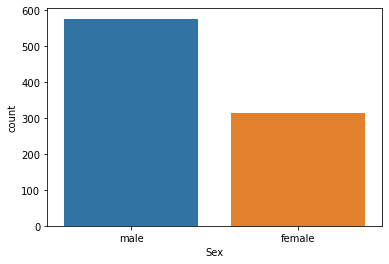

In [20]:
sns.countplot(ds['Sex'])

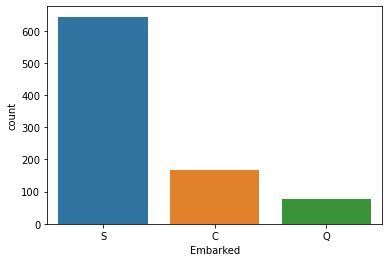

In [21]:
sns.countplot(ds['Embarked'])

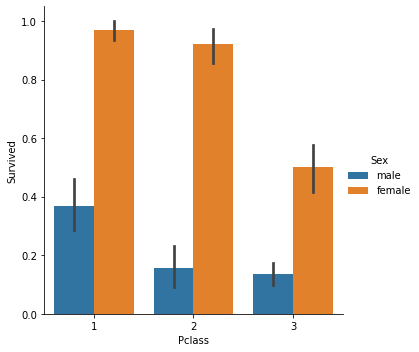

In [22]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=ds,kind='bar')       #this plot gives the inference of survival rate of passengers in various classes respective to their gender 

In [23]:
ds.shape

(891, 12)

In [24]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
ds.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


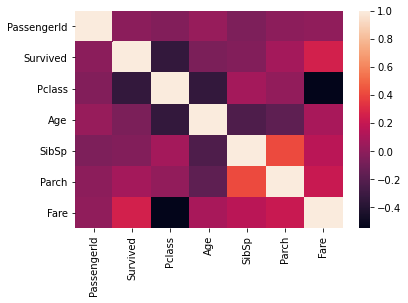

In [26]:
sns.heatmap(ds.corr())

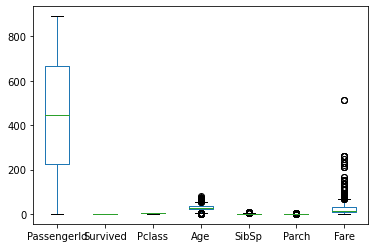

In [27]:
ds.plot(kind='box')

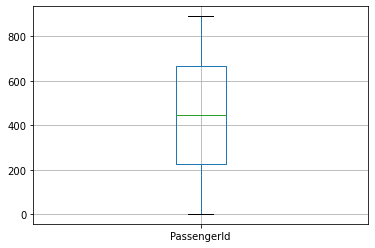

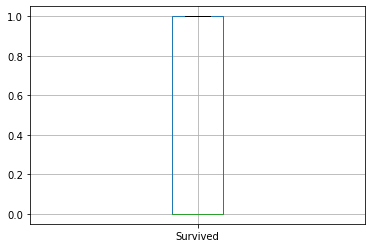

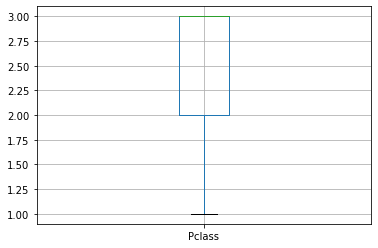

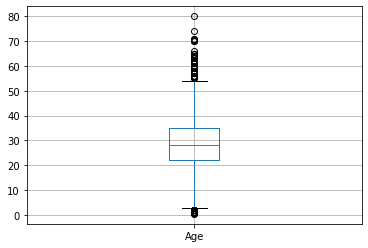

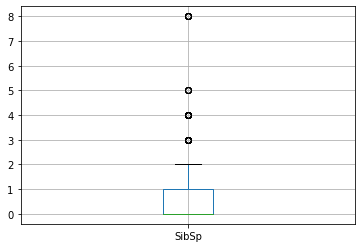

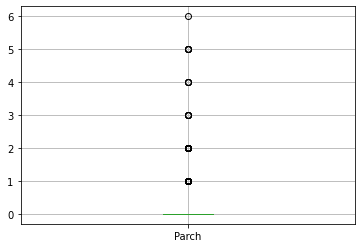

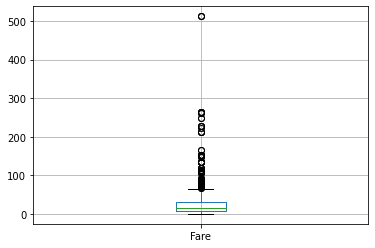

In [28]:
list=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
for i in list:
    plt.figure()
    ds.boxplot([i])

from the above plot we can find that outliers are present age,sibsp,parch,fare

In [29]:
ds.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In this dataset there are mainly three independent variables:- Age,Sex,Pclass which determines the survived rate(dependent variable).so we can drop the irrelevant columns and label encode the sex column

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Sex']=le.fit_transform(ds['Sex'])

In [31]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


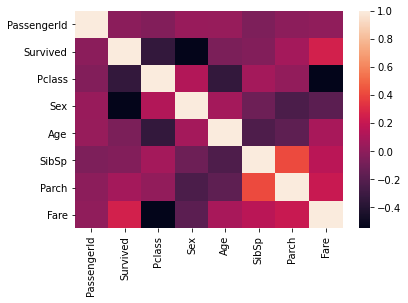

In [32]:
sns.heatmap(ds.corr())

In [33]:
ds       #here passengerid,sibsp,parch,fare,name,ticket,cabin,embarked columns are to be removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [34]:
ds.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],inplace=True)

In [35]:
ds

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
886,0,2,1,27.0
887,1,1,0,19.0
888,0,3,0,28.0
889,1,1,1,26.0


In [36]:
ds.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
dtype: float64

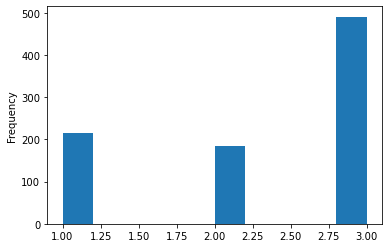

In [37]:
ds['Pclass'].plot.hist()

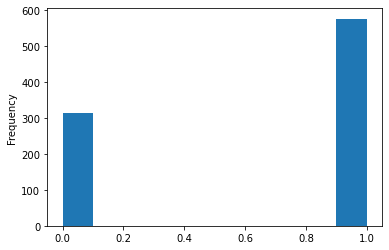

In [38]:
ds['Sex'].plot.hist()

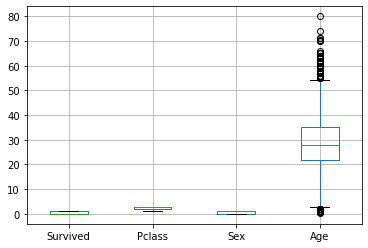

In [39]:
ds.boxplot()

In [40]:
#here we can see outliers present in age column.we have to treat them.
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)

ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(891, 4)
(884, 4)


Now we can move on to training the model

In [41]:
y=ds['Survived']

In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
x=ds.drop(columns=['Survived'])

In [44]:
x

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,28.0
889,1,1,26.0


In [45]:
x.shape

(891, 3)

In [46]:
y.shape

(891,)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [48]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=48)

In [49]:
train_x.shape

(694, 3)

In [50]:
train_y.shape

(694,)

In [51]:
test_x.shape

(197, 3)

In [52]:
test_y.shape

(197,)

In [53]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(train_x,train_y)
predlr=lg.predict(test_x)

print('Accuracy score:',accuracy_score(test_y,predlr))
print('Confusion matrix:\n',confusion_matrix(test_y,predlr))
print('Classification report:\n',classification_report(test_y,predlr))

Accuracy score: 0.766497461928934
Confusion matrix:
 [[92 26]
 [20 59]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       118
           1       0.69      0.75      0.72        79

    accuracy                           0.77       197
   macro avg       0.76      0.76      0.76       197
weighted avg       0.77      0.77      0.77       197



In [54]:
#GaussianNB
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)

print('Accuracy score:',accuracy_score(test_y,predgnb))
print('Confusion matrix:\n',confusion_matrix(test_y,predgnb))
print('Classification report:\n',classification_report(test_y,predgnb))


Accuracy score: 0.7868020304568528
Confusion matrix:
 [[98 20]
 [22 57]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       118
           1       0.74      0.72      0.73        79

    accuracy                           0.79       197
   macro avg       0.78      0.78      0.78       197
weighted avg       0.79      0.79      0.79       197



In [55]:
#Decision tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)

print('Accuracy score:',accuracy_score(test_y,preddtc))
print('Confusion matrix:\n',confusion_matrix(test_y,preddtc))
print('Classification report:\n',classification_report(test_y,preddtc))


Accuracy score: 0.8121827411167513
Confusion matrix:
 [[103  15]
 [ 22  57]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       118
           1       0.79      0.72      0.75        79

    accuracy                           0.81       197
   macro avg       0.81      0.80      0.80       197
weighted avg       0.81      0.81      0.81       197



In [56]:
#KNearest neighbors
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn=knn.predict(test_x)

print('Accuracy score:',accuracy_score(test_y,predknn))
print('Confusion matrix:\n',confusion_matrix(test_y,predknn))
print('Classification report:\n',classification_report(test_y,predknn))


Accuracy score: 0.7461928934010152
Confusion matrix:
 [[99 19]
 [31 48]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.72      0.61      0.66        79

    accuracy                           0.75       197
   macro avg       0.74      0.72      0.73       197
weighted avg       0.74      0.75      0.74       197



In [57]:
#we can create a fn inorder to find the metrics for different kernels of SVM Classifier
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    
    print('Accuracy score:',accuracy_score(test_y,predsvc))
    print('Confusion matrix:\n',confusion_matrix(test_y,predsvc))
    print('Classification report:\n',classification_report(test_y,predsvc))


In [58]:
svmkernel('rbf')

Accuracy score: 0.6294416243654822
Confusion matrix:
 [[116   2]
 [ 71   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       118
           1       0.80      0.10      0.18        79

    accuracy                           0.63       197
   macro avg       0.71      0.54      0.47       197
weighted avg       0.69      0.63      0.53       197



In [59]:
svmkernel('poly')

Accuracy score: 0.6548223350253807
Confusion matrix:
 [[115   3]
 [ 65  14]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.97      0.77       118
           1       0.82      0.18      0.29        79

    accuracy                           0.65       197
   macro avg       0.73      0.58      0.53       197
weighted avg       0.71      0.65      0.58       197



## Inference

For the titanic dataset we have made different classification models and found the metrics for each models.
The accuracy score of various models are:

Logistic Regression= 0.766497461928934

GausssianNB= 0.7868020304568528

Decsion Tree Classifier= 0.8121827411167513

KNearest Neighbors= 0.7461928934010152

svm('rbf')= 0.6294416243654822

svm('poly')= 0.6548223350253807

We can make the conclusion that for this dataset for the above chosen test_size and random_state Decision Tree Classifier is the more suitable training model.
we can also improve the scores by tuning the test size and random state parameters.